In [1]:
#Final Program
#Imports
import requests
import json
import math
import datetime
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pytz import timezone
import time
import copy
from IPython.display import clear_output
import os

#Initial Parameters
optionChainLink = "https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"
header_para = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'}
India_Time = timezone('Asia/Calcutta')  
timeOfData = []
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()
master_df = pd.DataFrame()
dataframe_list = [df1, df2, df3, df4, df5, df6]
Support = {}
Resistance = {}
run = 0

/var/folders/21/ylxbjwr94cv9sfw6qdty5f4h0000gq/T/ipykernel_30076/1227645540.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_list[i] = dataframe_list[i].append(insert_dict, ignore_index=True)
/var/folders/21/ylxbjwr94cv9sfw6qdty5f4h0000gq/T/ipykernel_30076/1227645540.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_list[i] = dataframe_list[i].append(insert_dict, ignore_index=True)
/var/folders/21/ylxbjwr94cv9sfw6qdty5f4h0000gq/T/ipykernel_30076/1227645540.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_list[i] = dataframe_list[i].append(insert_dict, ignore_index=True)
/var/folders/21/ylxbjwr94cv9sfw6qdty5f4h0000gq/T/ipykernel_30076/1227645540.py:82: FutureWarning: The frame.append 

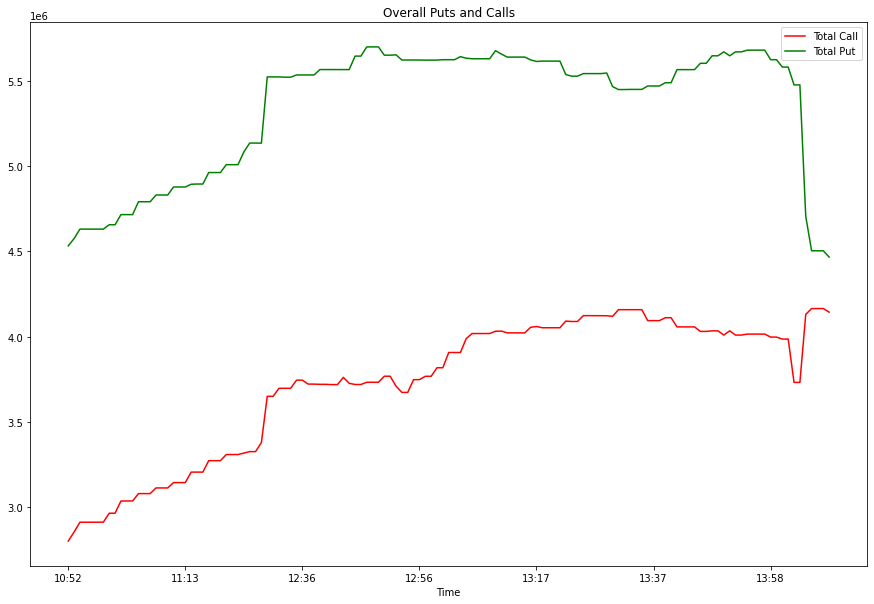

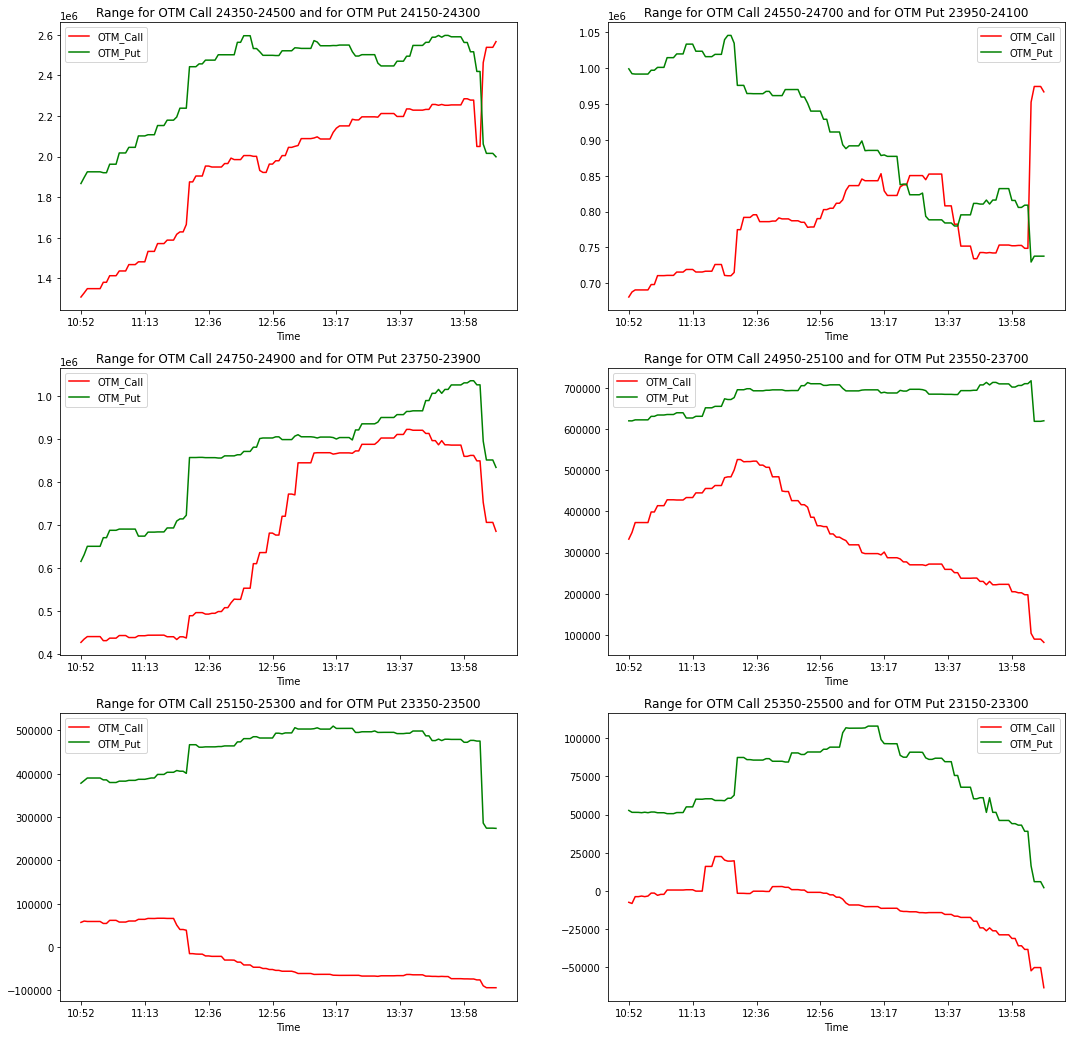

Current Nifty : 24313.05

Resistance Level 1: 24400 with 1154169 Open Intrests
Resistance Level 2: 24450 with 985397 Open Intrests
Resistance Level 3: 24500 with 854029 Open Intrests


Support Level 1: 24300 with 528659 Open Intrests
Support Level 2: 24250 with 669901 Open Intrests
Support Level 3: 24200 with 664198 Open Intrests


In [ ]:
while True:
    
    data = None
    while data is None:
        try:
            with requests.session() as s:
                data = s.get(optionChainLink, headers = header_para).json()
                raw_data = json.dumps(data)
            option = json.loads(raw_data)
            
            #Getting expiry dates from dict
            expiryDates = option['records']['expiryDates'][:1]
        
            #Time of Data Received
            timeOfData = option['records']['timestamp'][-8:-3]
    
            #Date of the Data
            dateOfData = option['records']['timestamp'][:11]
            
        except:
            pass
    
    if run == 0:
        currentNifty = option['records']['underlyingValue']
        
        new = currentNifty/100
        upper_range = (int(new)*100) + 1200
        lower_range = (int(new)*100) - 1200
        
        OTM_Call_1 = [strike for strike in option['records']['strikePrices'] if currentNifty < strike <= upper_range - 1000]
        OTM_Call_2 = [strike for strike in option['records']['strikePrices'] if currentNifty + 200 < strike <= upper_range - 800]
        OTM_Call_3 = [strike for strike in option['records']['strikePrices'] if currentNifty + 400 < strike <= upper_range - 600]
        OTM_Call_4 = [strike for strike in option['records']['strikePrices'] if currentNifty + 600 < strike <= upper_range - 400]
        OTM_Call_5 = [strike for strike in option['records']['strikePrices'] if currentNifty + 800 < strike <= upper_range - 200]
        OTM_Call_6 = [strike for strike in option['records']['strikePrices'] if currentNifty + 1000 < strike <= upper_range]

        OTM_Put_1 = [strike for strike in option['records']['strikePrices'] if  lower_range + 1000 < strike <= currentNifty]
        OTM_Put_2 = [strike for strike in option['records']['strikePrices'] if  lower_range + 800< strike <= currentNifty - 200]
        OTM_Put_3 = [strike for strike in option['records']['strikePrices'] if  lower_range + 600 < strike <= currentNifty - 400]
        OTM_Put_4 = [strike for strike in option['records']['strikePrices'] if  lower_range + 400 < strike <= currentNifty - 600]
        OTM_Put_5 = [strike for strike in option['records']['strikePrices'] if  lower_range + 200 < strike <= currentNifty - 800]
        OTM_Put_6 = [strike for strike in option['records']['strikePrices'] if  lower_range  < strike <= currentNifty - 1000]
        
        OTM_Call = [OTM_Call_1, OTM_Call_2, OTM_Call_3, OTM_Call_4, OTM_Call_5,OTM_Call_6]
        OTM_Put = [OTM_Put_1, OTM_Put_2, OTM_Put_3, OTM_Put_4, OTM_Put_5, OTM_Put_6]
        
        run = run + 1
        
    #Getting expiry dates from dict
    #expiryDates = option['records']['expiryDates'][:1]
        
    #Time of Data Received
    #timeOfData = option['records']['timestamp'][-8:-3]
    
    #Date of the Data
    #dateOfData = option['records']['timestamp'][:11]
     
    PE = 0 
    CE = 0
    
    for i in range(len(OTM_Call)):
        total_ce = 0
        total_pe = 0
        for block in option['records']['data'][:]:
            if block['strikePrice'] in OTM_Call[i] and block['expiryDate'] in expiryDates:
                try:
                    ce = block['CE']['changeinOpenInterest']
                    total_ce = total_ce + ce
                    CE = CE + ce
                except:
                    ce = 0

            if block['strikePrice'] in OTM_Put[i] and block['expiryDate'] in expiryDates:
                try:
                    pe = block['PE']['changeinOpenInterest']
                    total_pe = total_pe + pe
                    PE = PE + pe
                except:
                    pe = 0
        #Form a Dictionary to append Data to Dataframe
        insert_dict = {'Time' : timeOfData, "OTM_Call" : total_ce, "OTM_Put" : total_pe}
        dataframe_list[i] = dataframe_list[i].append(insert_dict, ignore_index=True)
        
    master_insert = {'Time' : timeOfData, "Total Call" : CE, "Total Put" : PE}
    master_df = master_df.append(master_insert, ignore_index = True)  

    #DataFrame is Ready
    
    figs, axs = plt.subplots(figsize = (15,10))
    master_df.plot(x = 'Time', title = "Overall Puts and Calls", ax = axs, y = "Total Call", color = "Red")
    master_df.plot(x = 'Time', ax = axs, y = "Total Put", color = "Green")
    
    fig, axes = plt.subplots(3, 2,figsize=(18,18))

    count = 0
    for r in range(3):
        for c in range(2):
            name = "Range for OTM Call " + str(OTM_Call[count][0]) + "-" + str(OTM_Call[count][-1]) + " and for OTM Put " + str(OTM_Put[count][0]) + "-" + str(OTM_Put[count][-1])
            dataframe_list[count].plot(x = 'Time', ax = axes[r,c], title = name, color = 'Red', y = "OTM_Call")
            dataframe_list[count].plot(x = 'Time', ax = axes[r,c], color = 'Green', y = "OTM_Put")
            count = count + 1

    plt.show()    
    
    print(f"Current Nifty : {currentNifty}\n")

            
    for block in option['records']['data'][:]:
        if currentNifty <= block['strikePrice'] <= upper_range + 1300 and block['expiryDate'] in expiryDates:
            Resistance[block['strikePrice']] = block['CE']['openInterest']
    Resistance = dict(sorted(Resistance.items(), reverse = True ,key=lambda item: item[1]))
    for i in range(3):
        print("Resistance Level " + str(i + 1) + ": " + str(sorted(list(Resistance.keys())[:5])[:3][i]) + " with " + str(Resistance[sorted(list(Resistance.keys())[:5])[:3][i]]) + " Open Intrests")

    print('\n')
    
    for block in option['records']['data'][:]:
        if lower_range - 1300 <= block['strikePrice'] <= currentNifty and block['expiryDate'] in expiryDates:
            Support[block['strikePrice']] = block['PE']['openInterest']
    Support = dict(sorted(Support.items(), reverse = True ,key=lambda item: item[1]))
    for i in range(3):
        print("Support Level " + str(i + 1) + ": " + str(sorted(list(Support.keys())[:5], reverse = True)[:3][i]) + " with " + str(Support[sorted(list(Support.keys())[:5])[:3][i]]) + " Open Intrests")

    
    if datetime.datetime.now(India_Time).strftime("%H:%M") > '15:30':
        print('Market Closed')
        break
        
    clear_output(wait=True)

    time.sleep(60)
        
        
        